<a href="https://colab.research.google.com/github/Akash1542/707-lecture-master/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [21]:
#Exercise 1
file_path = "/content/2019_Yellow_Taxi_Trip_Data.csv"
df = pd.read_csv(file_path)
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


In [4]:
#Exercise 2
df.shape

(10000, 18)

In [5]:
#Exercise 3
df[['fare_amount','tip_amount','tolls_amount','total_amount']].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


In [6]:
#Exercise 4
count=df.isna().sum()
print(count)

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64


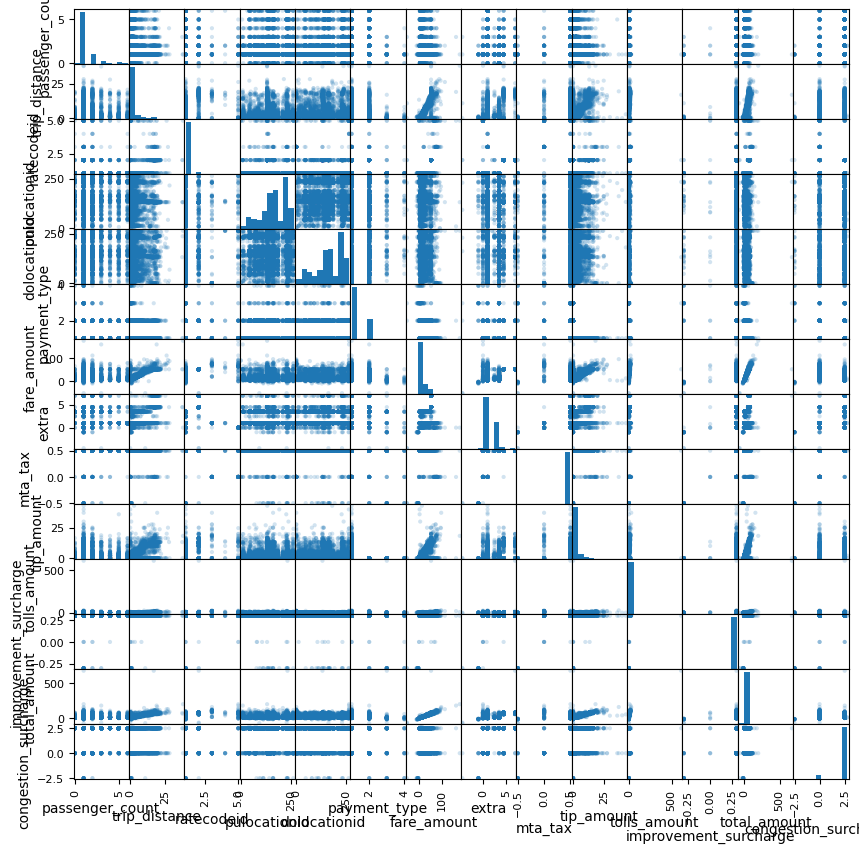

In [9]:
#Exercise 5
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
columns_to_drop=['vendorid']
df=df.drop(columns=columns_to_drop, errors='ignore')
date_columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df=df.drop(columns=date_columns, errors='ignore')
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='hist')
plt.show()

count    10000.000000
mean        22.564659
std         19.209255
min        -65.920000
25%         12.375000
50%         16.300000
75%         22.880000
max        671.800000
Name: total_amount, dtype: float64


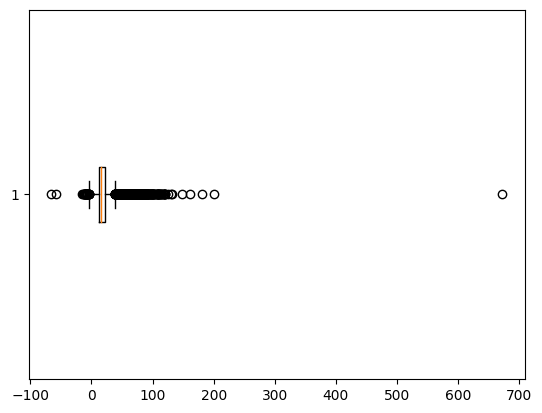

In [10]:
#Exercise 6
total_amount_column=df['total_amount']
print(total_amount_column.describe())
plt.boxplot(total_amount_column, vert=False)
plt.show()
# As we can see there are outliers in the total_amount column because the data points are extending beyond the extremes of the graphs.

In [20]:
#Exercise 7
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
Y = df['fare_amount']
X = df.drop(['fare_amount', 'total_amount', 'store_and_fwd_flag'], axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state=0)
model = LinearRegression(fit_intercept=True)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
linear_rmse = mean_squared_error(ytest, y_model, squared=False)
linear_rmse

11.633345109171756

In [17]:
#EXercise 8
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(Xtrain, ytrain)
y_predictions = tree_reg.predict(Xtest)
rmse = mean_squared_error(ytest, y_predictions, squared=False)
rmse

4.856317304295509